Задача: Провести А/Б тестирование для нового дизайна сайта по доставке еды (изменение формата фото блюд на сайте, формат кнопки "Оформление заказа").

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

%matplotlib inline

In [ ]:
#Прочитаем данные

In [4]:
form_df=pd.read_csv('5_task_1.csv') # Данные А\Б теста формата фото блюд.
color_df=pd.read_csv('5_task_2.csv') #Данные А\Б формата кнопки при оформлении заказа.

Проведем исследование по выбору формата фото товара.

In [57]:
form_df.head()

id group  events
0  16046     A      14
1  18712     A      41
2   3268     A      30
3  22633     A      37
4  28071     A      38

In [ ]:
#проверим данные на гомогенность дисперсий с помощью критерия Левена

In [12]:
st.levene(form_df.query('group == "A"').events,form_df.query('group == "B"').events,form_df.query('group == "C"').events)
#Дисперсии в группах можно считать гомогенными

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [ ]:
#проверим распределния на нормальность.
#Для этого сделаем выборку по 1000 наблюдений из каждой группы для теста Шапиро-Вилка.

In [24]:
sample_A=form_df.query('group == "A"').events.sample(n=1000,random_state=17)
sample_B=form_df.query('group == "B"').events.sample(n=1000,random_state=17)
sample_C=form_df.query('group == "C"').events.sample(n=1000,random_state=17)

In [23]:
st.shapiro(sample_A)

(0.9973153471946716, 0.09609563648700714)

In [25]:
st.shapiro(sample_B)

(0.9980798363685608, 0.31768906116485596)

In [26]:
st.shapiro(sample_C)

(0.9981185793876648, 0.3359004259109497)

In [ ]:
# Распределения во всех группах можно считать нормальными.

In [ ]:
#Проведем однофакторный ANOVA для определения различий между группами.

In [27]:
st.f_oneway(form_df.query('group == "A"').events, form_df.query('group == "B"').events,form_df.query('group == "C"').events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [ ]:
#По результату теста можно сказать, что значимые различия между группами имеются.

In [ ]:
# Проведем анализ групп с помощью теста Тьюки

In [39]:
tukey_df=form_df[['group','events']]

In [46]:
MC=MultiComparison(tukey_df['events'], groups=tukey_df['group'])

In [52]:
MC.tukeyhsd().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
#По результатм видно, что значимые различия есть между всеми параи групп.
#Построим график распределений.

In [59]:
plt.figure(figsize=(16,8))
sns.pointplot(x = 'group', y = 'events', data = form_df, capsize = .2)
plt.title('Зависимость просмотров от формы фото')
plt.xlabel('Форма')
plt.ylabel('Покупки')

Text(0, 0.5, 'Покупки')

In [ ]:
#По результатам проведенного исследования следует выбрать формат В.

Далее проведем исследование по выбору формата кнопки.

In [58]:
color_df.head()

id group segment  events
0  83440  test    high    78.0
1  96723  test    high    71.0
2  68719  test    high    80.0
3  50399  test    high    80.0
4  95613  test    high    78.0

In [60]:
#Проверим распределение покупок в тестовой и контрольной группах.

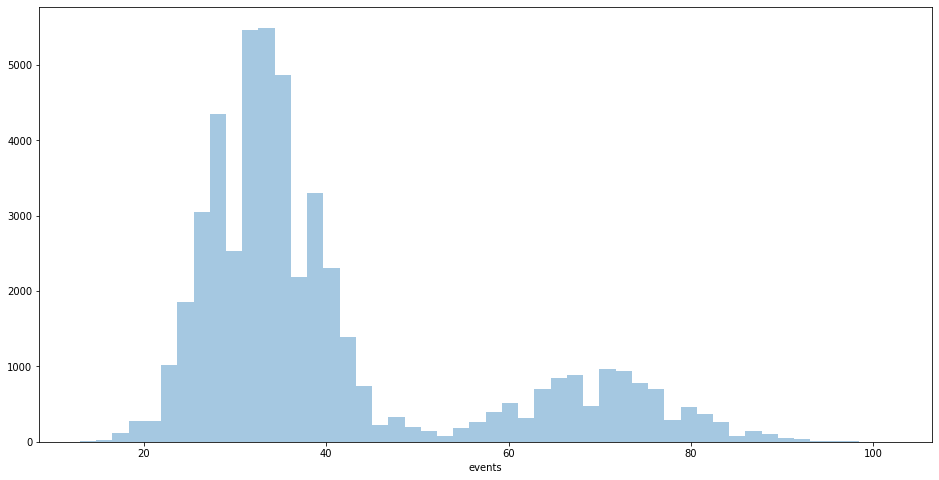

In [65]:
plt.figure(figsize=(16,8))
sns.distplot(color_df.query('group == "test"').events, kde=False)

In [66]:
plt.figure(figsize=(16,8))
sns.distplot(color_df.query('group == "control"').events, kde=False)

In [69]:
#Посмотрим на медианы, стандартные отклонения и средние распределений с разбивкой по сегментам и группам.

In [68]:
color_df.groupby(['group','segment'],as_index=False).agg({'events':'median'})

group segment  events
0  control    high    60.0
1  control     low    20.0
2     test    high    70.0
3     test     low    33.0

In [74]:
color_df.groupby(['group','segment'],as_index=False).agg({'events':'std'}).round(2)

group segment  events
0  control    high    7.81
1  control     low    4.47
2     test    high    8.40
3     test     low    5.72

In [72]:
color_df.groupby(['group','segment'],as_index=False).agg({'events':'mean'})

group segment     events
0  control    high  59.970800
1  control     low  20.031575
2     test    high  69.938500
3     test     low  33.025925

In [85]:
color_df['combinations'] = color_df['group'] + " / " + color_df['segment']

In [ ]:
#теперь необходимо провести тест Тьюки для определения значимых различий между группами в разбивке по сегментам

In [88]:
MC=MultiComparison(color_df['events'], groups=color_df['combinations'])

In [90]:
MC.tukeyhsd().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
#По всем группам были получены статистически значимые различия. 
#В High сегменте разница в средних составила ~10, а в Low сегменте ~13.

In [ ]:
#Теперь проведем многофакторный ANOVA для оценки влияния факторов группы и сегмента на количество покупок.

In [76]:
formula = 'events ~ segment + group + segment:group'
model = ols(formula, color_df).fit()
aov_table = anova_lm(model, typ=2)

In [77]:
aov_table

sum_sq       df              F         PR(>F)
segment        2.362480e+07      1.0  689756.377485   0.000000e+00
group          3.837195e+06      1.0  112031.864119   0.000000e+00
segment:group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN

In [ ]:
#Оба фактора оказались статистически значимыми. 

In [ ]:
#Можно сделать вывод:
#Гипотеза о том, что старый дизайн кнопки ничем не отличается от нового, не согласуется с полученными данными. 
#Используем новый дизайн.